# Amazon Reviews on Kindle products

### The scope of the project is to explore the reviews submitted by users and understand in depth about the recommendations

# 1. Understand and clean the data

- Check for null values
- Drop columns which arent useful


In [1]:
import pandas as pd
import numpy as np

In [2]:
add = "./1429_1.csv"

reviews = pd.read_csv(add,low_memory=False)
reviews.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']

In [3]:
reviews.nunique()

id                 42
name               48
asins              41
brand               6
categories         41
keys               42
manufacturer        2
date             1078
dateAdded        1941
dateSeen         3911
didPurchase         1
doRecommend         2
id                  1
numHelpful         97
rating              5
sourceURLs      11929
text            34659
title           19767
userCity            0
userProvince        0
username        26789
dtype: int64

There are lot of null values and irrelevant columns 

In [4]:
reviews.isnull().sum()
#lets drop usernames, userProvince,id,didPurchase

id                  0
name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
didPurchase     34659
doRecommend       594
id              34659
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
userCity        34660
userProvince    34660
username            2
dtype: int64

In [5]:
reviews.drop(labels=['didPurchase','id','userCity','userProvince'],axis=1,inplace=True)

In [6]:
reviews.isnull().sum()

name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
doRecommend       594
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
username            2
dtype: int64

# 2. Speculate whether ratings are genuine ?
- what if the one user is trying to give all rating ?
- How will the distribution look for bulk users ?
- How many users are bulk ?

### Are the all the reviews given by same group of users ? 

In [7]:
rating_perperson=reviews.username.value_counts()
#ratings 
print ("Total ratings : " + str(sum(rating_perperson)))
print ("Total users : " + str(len(rating_perperson)))
print("Users giving bulk ratings (more than 10) : " + str(sum(rating_perperson >10)))
bulk = rating_perperson[rating_perperson >10]
bulk_rating = sum(bulk)
print ("Bulk ratings : " + str(bulk_rating))
print ("Populations of bulk ratings : " + str(bulk_rating*100/sum(rating_perperson)))
print ("Populations of bulk users : " + str(sum(rating_perperson >10)*100/len(rating_perperson)))
rating_perperson.value_counts().plot(kind='pie',figsize=(10,10), title='Ratings Per User')

Total ratings : 34658
Total users : 26789
Users giving bulk ratings (more than 10) : 146
Bulk ratings : 3160
Populations of bulk ratings : 9.117664031392463
Populations of bulk users : 0.5449998133562283


#### Although the pie chart reveals that most of the users have given single rating but its interesting to note following fact
 #### 1 : Only 0.55 % of the users are bulk users
 #### 2 : Around 9 % of the ratings have been submitted by just 0.55% users - Does it seem odd to you ?

count    3158.000000
mean        4.593414
std         0.732940
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
count    31469.000000
mean         4.583686
std          0.735930
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


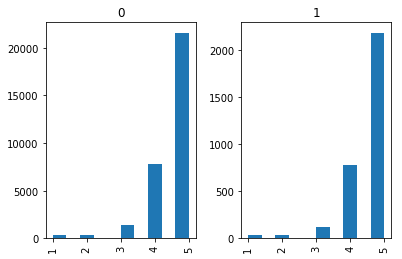

In [8]:
reviews['bulk']= reviews['username'].apply(lambda x : 1 if x in bulk.index else 0)
#gives us the category whether a rating is bulk or not
from matplotlib import pyplot
#series.hist(by=series)
print(reviews.rating.hist(by=reviews.bulk))
print(reviews[reviews.bulk==1].rating.describe())
print(reviews[reviews.bulk==0].rating.describe())


### Well ! that picture says it all. Now we dont think that bulk users are spam since the have the same rating distribution as others

### Distribution of User rating

*** Rating distribution ***
5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64


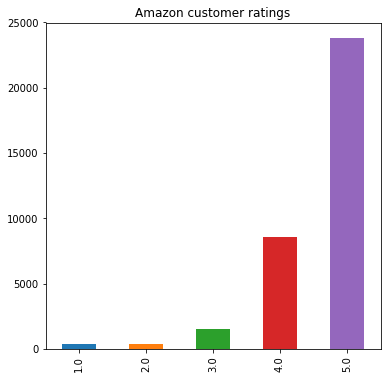

In [9]:
from matplotlib import pyplot
%matplotlib inline

star = reviews.rating.value_counts()
print("*** Rating distribution ***")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

# 3. Find the NPS net promoter score of amazon
- What's NPS score ?
- How do we calculate it for amazon?

# NPS Score ( Net promoter score ) 

#### Net Promoters Score helps us evaluate customer satisfaction and loyalty

Rating 1,2,3 - Detractors <br>
Rating 4   - Passive <br>
Rating 5 - Promoters <br>

NPS = (Promoters - Detractors)/Total ratings * 100

In [10]:
NPS_score = round (100*((star.loc[5])-sum(star.loc[1:3]))/sum(star.loc[:]),2)
print (" NPS score of Amazon is : "  + str(NPS_score))


 NPS score of Amazon is : 61.99


# 4. Pick a product and deep dive
- We will pick one variation of kindle product drill & analyse its characteristics

Lets deep dive and pick product to analyse. Top 10 populated products are presented below. Taking the most populated, since it is not Kindle. 

In [11]:
top = reviews.groupby(['name']).count().asins.sort_values(ascending=False).reset_index().rename(columns={'asins':'count'}).head(30)
top

,name,count
0,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",10966
1,"Echo (White),,,\r\nEcho (White),,,",3309
2,Amazon Kindle Paperwhite - eBook reader - 4 GB...,3176
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",2814
4,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,",2527
5,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",1685
6,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,1036
7,"Kindle Voyage E-reader, 6 High-Resolution Disp...",580
8,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",372
9,Amazon - Amazon Tap Portable Bluetooth and Wi-...,318


In [12]:
top_1 = top.name.iloc[0]

In [13]:
top_1

'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta'

In [14]:
fire_t = reviews[reviews.name==top_1]

In [15]:
fire_t.isnull().sum()
# The dataset looks good to go

name              0
asins             0
brand             0
categories        0
keys              0
manufacturer      0
date              0
dateAdded       215
dateSeen          0
doRecommend       4
numHelpful        4
rating            4
sourceURLs        0
text              0
title             0
username          1
bulk              0
dtype: int64

# 5. Fire Tablet - NPS score  ? 

 NPS score of Fire Tablet is : 49.79


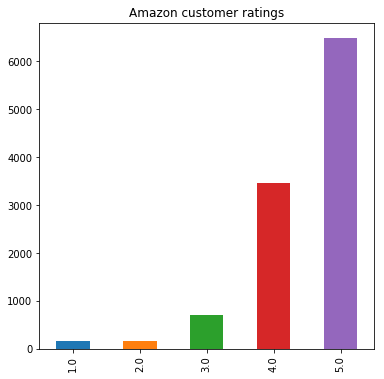

In [16]:
fire_t_scores = fire_t.rating.value_counts()
fire_t_scores.sort_index(inplace=True)

Fire_NPS_score = round (100*(fire_t_scores[5]-sum(fire_t_scores[1:3]))/sum(fire_t_scores),2)
print (" NPS score of Fire Tablet is : "  + str(Fire_NPS_score))
#worse NPS than overall amazon
fire_t_scores.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

### What about recommendations ? How is rating related to recommendation ?

In [17]:
fire_t.doRecommend.value_counts()

True     10420
False      542
Name: doRecommend, dtype: int64

Text(0.5,1,'Ranking versus recommending or not')

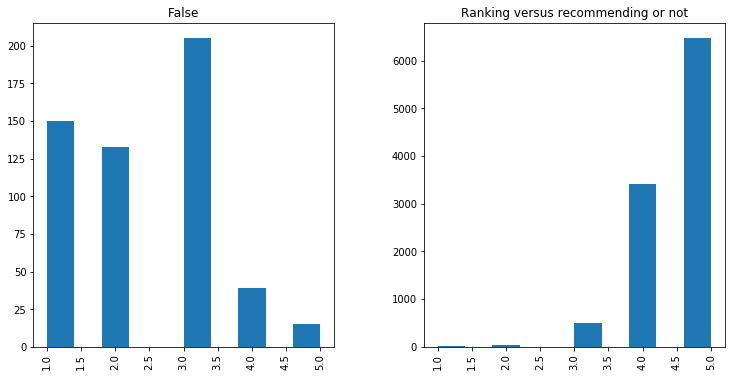

In [18]:
import matplotlib.pyplot as plt
fire_t.rating.hist(by=fire_t.doRecommend,figsize=(12,6))
plt.title('Ranking versus recommending or not')

In [19]:
plus_fire = fire_t[fire_t.doRecommend==True].rating.value_counts()
plus_fire.sort_index(inplace=True)
recomm_NPS = round(100*(sum(plus_fire[4:5])-sum(plus_fire[1:2]))/sum(plus_fire),2)
minus_fire = fire_t[fire_t.doRecommend==False].rating.value_counts()
minus_fire.sort_index(inplace=True)
notrecomm_NPS = round(100*(sum(minus_fire[4:5])-sum(minus_fire[1:2]))/sum(minus_fire),2)
print("Those who recommend amazon kindle generate high NPS score of " + str(recomm_NPS))
print("Those who DO NOT recommend kindle produce a NPS score of " + str(notrecomm_NPS))

Those who recommend amazon kindle generate high NPS score of 94.44
Those who DO NOT recommend kindle produce a NPS score of -42.25


# 6. Fire Tablet - Plot time series for reviews 
- How to handle date time text ?
- How to plot time series on a graph ? 
- How does the graph look like in small intervals of 5 days or 10 days or 30 days ?
- Did the performance (NPS) go up or down with time ?
#### The release was in the end of 2012, which makes it safe to start comments analysis after 2013-01-01

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Number of reviews')

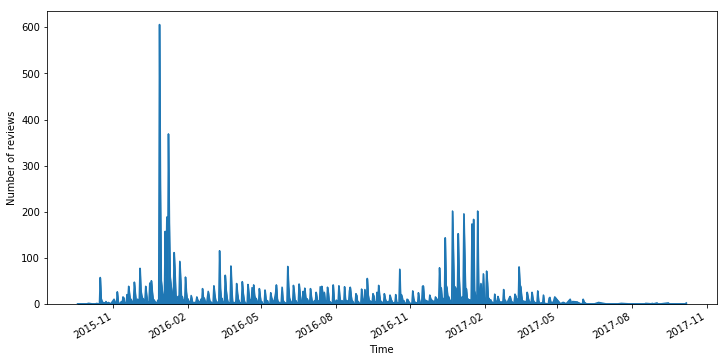

In [20]:
fire_t['temp'] = fire_t.date.apply(lambda x : pd.to_datetime(x).date())
fire_t = fire_t[fire_t.temp>pd.to_datetime('2013-01-01').date()]
fire_review_dates = fire_t.date.value_counts()
fire_review_dates.sort_index(inplace=True)
fire_review_dates = fire_review_dates.reindex(pd.to_datetime(fire_review_dates.index))
fire_review_dates.plot(kind='area',figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Number of reviews')

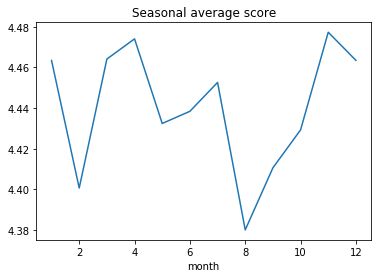

Text(0.5,1,'Seasonal standard deviation of the scores')

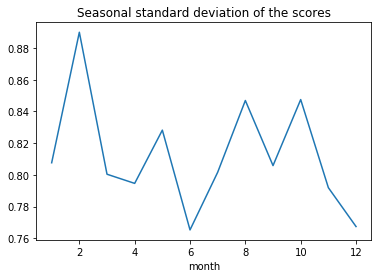

In [21]:
#rating_perdate = fire_review_dates.sort_values(ascending=False)
#peakrating = rating_perdate#[:20]
#peak_month=[]
fire_t['month'] = fire_t.date.apply(lambda x : pd.to_datetime(x).month)
fire_t.groupby('month').mean().rating.plot()
plt.title('Seasonal average score')
plt.show()
fire_t.groupby('month').std().rating.plot()
plt.title('Seasonal standard deviation of the scores')
# for x in peakrating.index:
#     peak_month.append(pd.to_datetime(x).month)
#pd.Series(peak_month).value_counts()

### Number of reviews for each month - the most active time is Dec, Jan; least active - May, Aug

Text(0,0.5,'Number of reviews')

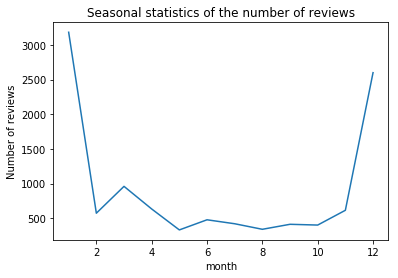

In [22]:
fire_t.groupby('month').count().name.rename(columns={'name':'number of reviews'}).plot()
plt.title('Seasonal statistics of the number of reviews')
plt.ylabel('Number of reviews')

Text(0.5,1,'Daily average rating of the reviews')

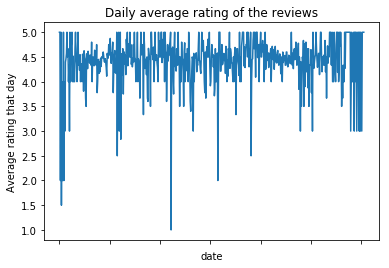

In [23]:
fire_t.groupby('date').mean().rating.dropna().plot()
plt.ylabel('Average rating that day')
plt.title('Daily average rating of the reviews')

#### Insight 
1. December and January are months with the highest ranking activity (sells).
2. August and February are months with the most pessimistic average rating.  
3. February is the month with the highest scores standard deviation - might be caused by the weather conditions. User geolocation may be investigated to proof the hypothesis.  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AACB8D0>]],
      dtype=object)

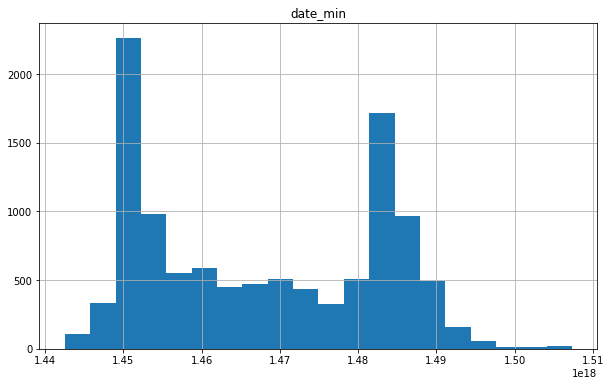

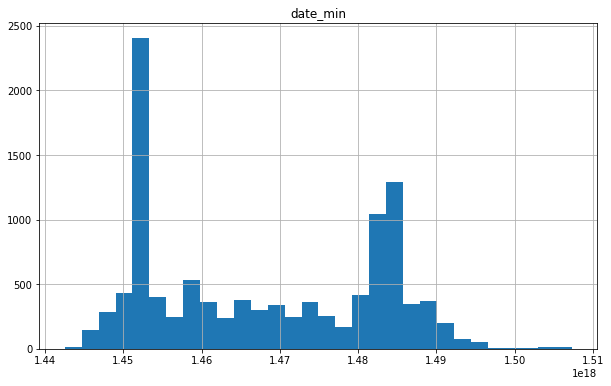

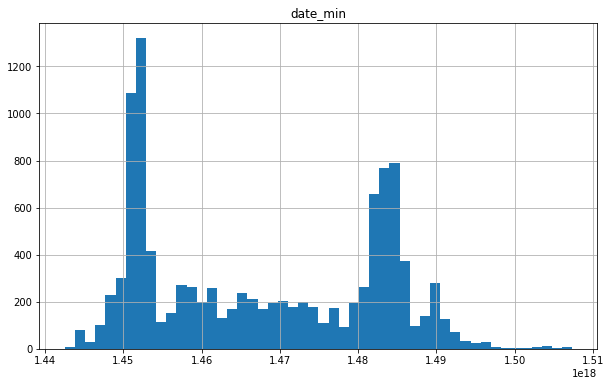

In [24]:
rating_series = pd.DataFrame(fire_t.date)
dforms=[]
for x in rating_series.date:
    dforms.append((pd.to_datetime(x)).value)
# now we have dforms which has dates transformed to numeric values
rating2 = rating_series.assign(date_min = dforms)
rating2.reset_index(inplace=True)
#rating2.set_index('date_min')
#rating2.columns=['timestamp_string','review_count','date_min']
bins = np.linspace(min(rating2.date_min),max(rating2.date_min),num=50)
rating2.hist(column='date_min', bins=20,figsize=(10,6),)
rating2.hist(column='date_min', bins=30,figsize=(10,6))
rating2.hist(column='date_min', bins=50,figsize=(10,6))


In [25]:
def NPS_eval (A):
    score =0
    for x in A[:]:
        if (x>4) :
            score+=1
        elif (x<4) :
            score-=1
    return 100*score/len(A)    

In [26]:
NPS_overtime = fire_t[['temp','rating']]
NPS_overtime = NPS_overtime[pd.to_datetime(NPS_overtime.temp)>pd.to_datetime('2013-01-01')]

In [27]:
NPS_overtime_agg = NPS_overtime.groupby(by='temp').agg(NPS_eval)

Text(0.5,1,'NPS score over time change, daily')

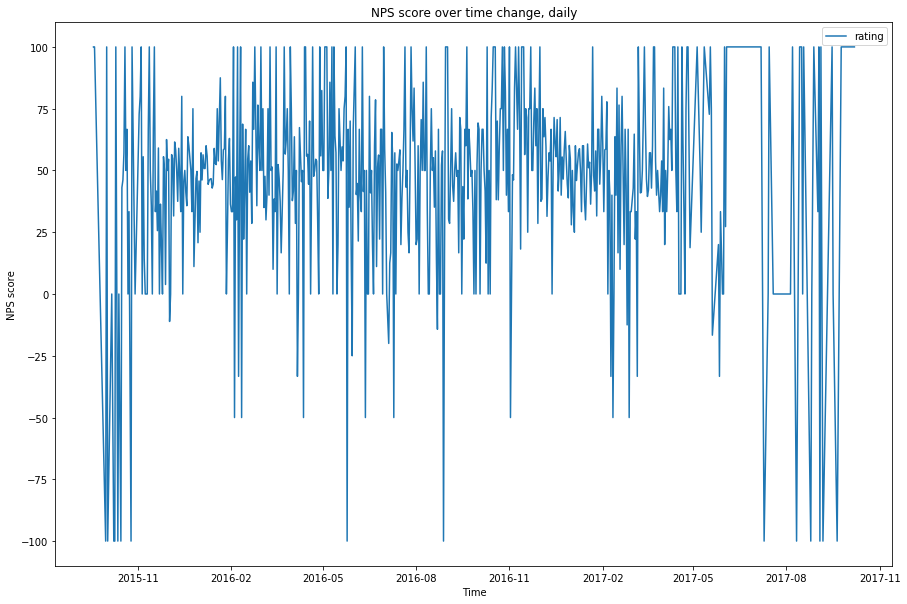

In [28]:
NPS_overtime_agg.plot(figsize=(15,10))
plt.ylabel('NPS score')
plt.xlabel('Time')
plt.title('NPS score over time change, daily')

Text(0,0.5,'NPS score')

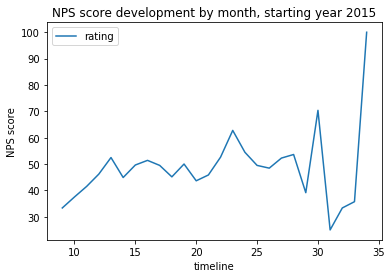

In [29]:
NPS_overtime['timeline']=NPS_overtime['temp'].apply(lambda x : (x.month+(12*(x.year-2015))))
NPS_by_month= NPS_overtime.groupby(by='timeline').agg(NPS_eval)
NPS_by_month.plot()
plt.title('NPS score development by month, starting year 2015')
plt.ylabel('NPS score')

# 7. [Fire Tablet] Predict Recommendations based on reviews content
- Make a clean function
  - Remove punctuations
  - Remove stopwords
  - Stem vs Lemmatize
- Create a TFIDF vectorizer
- Create Features
- Understand and explore sentiment analysis
    - Use compound feature
- Use RandomForestClassifier
- Check the score 
        

## Can we predict Recommendations with given comments on product ?

In [30]:
comments = pd.concat([fire_t['text']+". "+ fire_t['title'],fire_t['rating'],fire_t['doRecommend']],axis=1)
comments.columns=['text','rating','recommend']

In [31]:
comments.head()

,text,rating,recommend
3480,The sales people are really nice and knowledge...,5.0,True
3481,Great product and service and the sales man r ...,5.0,True
3482,Great product and service will refer to a frie...,5.0,True
3483,very good product and service will refer a fri...,5.0,True
3484,Great selections. Hard to find assistance at t...,5.0,True


In [40]:
import string
import nltk
from nltk import PorterStemmer
import re 
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()

def clean_stem (sent, seq=False):
    if seq==False:
        temp1 ="".join(x for x in sent if x not in string.punctuation)
    else:
        temp1=sent
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [ps.stem(x) for x in temp2 if x not in stopwords]
    return (temp3)

def clean_lemma (sent, seq=False): 
    if seq==False:
        temp1 ="".join(x for x in sent if x not in string.punctuation)
    else:
        temp1=sent
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [wn.lemmatize(x) for x in temp2 if x not in stopwords]
    return (temp3)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sokolovsky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
text="Hello this is, my happiest place. organize, organizes, and organizing in Happy world ! with happiness ..\
so much of happy!! "

print("Stemmed " + "-".join(clean_stem(text)))
print("Lemmatized " + "-".join(clean_lemma(text)))

Stemmed hello-happiest-place-organ-organ-organ-happi-world-happi-much-happi-
Lemmatized hello-happiest-place-organize-organizes-organizing-happy-world-happiness-much-happy-


### Lets create vectors from the text columns

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectstem = TfidfVectorizer(analyzer=clean_stem)
vectlemm = TfidfVectorizer(analyzer=clean_lemma)

textfeatures=vectstem.fit_transform(comments['text'])
print("Stemmed - " + str(len(vectstem.get_feature_names())))

vectlemm.fit_transform(comments['text'])
print("Lemmatized - " + str(len(vectlemm.get_feature_names())))

Stemmed - 6512
Lemmatized - 7924


In [46]:
test = comments['text'].apply(lambda x: '-'.join(clean_stem(x)))
test_2 = test.apply(lambda x: '-'.join(clean_lemma(x,True)))

In [47]:
test_2.head()

3480    sale-peopl-realli-nice-knowledg-come-back-grea...
3481    great-product-servic-sale-man-r-realli-nice-gr...
3482    great-product-servic-refer-friend-sale-man-r-g...
3483    good-product-servic-refer-friend-good-product-...
3484       great-select-hard-find-assist-time-good-select
Name: text, dtype: object

In [48]:
vect_seq = TfidfVectorizer(analyzer='word')
vect_seq.fit_transform(test_2)
print("Sequential - " + str(len(vect_seq.get_feature_names())))

Sequential - 6439


Stemmed has features 19 % lower than that of Lemmatized. 
    - In the above example in happy line, you can see how ineffective lemmatization can be 
    - Thus we will be applying cleanstem algo here
    - Lower features means more information density in the compressed columns
    - Sequential implementation of both vectorizers allows to decrease the number of features by around 100 (both orders were tried), which is negligible with respect to the total number of features.

### Lets create a dataset from the stemmed data and ratings (for the future)

In [49]:
tfidf_feats = pd.DataFrame(textfeatures.toarray(),index = comments.index,columns=vectstem.vocabulary_)

In [50]:
tf_idf_dataset = pd.concat([tfidf_feats,comments['rating']],axis=1)

The column names dont make sense - Need to update them with real words
    - for this we use vectstem.vocabulary_ to modify the columns

In [51]:
textmatrix = pd.DataFrame(textfeatures.toarray(),columns=vectstem.vocabulary_)
textmatrix.head(5)

,sale,peopl,realli,nice,knowledg,come,back,great,product,servic,...,paw,on,rad,strang,naviag,fore,windowsbas,lockeddown,outclass,facial
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
sum_scores = pd.DataFrame(textmatrix.sum(),columns=['sum_scores_TFIDF'])
sum_scores.head(10)

,sum_scores_TFIDF
sale,25.284546
peopl,1.211787
realli,0.522804
nice,19.733924
knowledg,33.579885
come,9.991285
back,1.862453
great,0.583441
product,0.112063
servic,1.243636


In [53]:
# Need to see most important words in the reviews
# words used by many people or less frequent in sentences
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=True)[:5] 

,sum_scores_TFIDF
capac,0.060817
musicvideo,0.060817
microdisk,0.060817
kindlewhich,0.060817
versatil,0.060817


In [54]:
#high usage of words in reviews
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=False)[:5]

,sum_scores_TFIDF
youtubepandora,914.119108
minu,888.488688
vers,547.628470
granddaughterit,525.518086
alreadygood,497.459763


### Lets build features on our data


In [55]:
pd.set_option('display.max_colwidth', 0)
comments.head()

,text,rating,recommend
3480,The sales people are really nice and knowledgeable to me I will come back again. Great product,5.0,True
3481,Great product and service and the sales man r really nice.. Great product,5.0,True
3482,Great product and service will refer to a friend. And the sales man r good. Great product and service,5.0,True
3483,very good product and service will refer a friend.. very good product and service.,5.0,True
3484,Great selections. Hard to find assistance at times.. Good selection.,5.0,True


**What is sentiment analysis ? No idea ? 
**Read the next code block

In [58]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

happy = "I am Happy. this is so awesome. I love life. I will be in heaven"
#when you find free food in university
print("happy " + str(sid.polarity_scores(text)))


sad = "i hate this. I am mad this is stupid. I will kill you"
#when your professor gives you a ZERO in assignment
print("sad " + str(sid.polarity_scores(sad)))

neut = "I will come. You should go. This is blue color"
#when you state facts and nothing else
print("dont care - " + str(sid.polarity_scores(neut)))

srishti = "money"
print("dss - " + str(sid.polarity_scores(srishti)))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sokolovsky\AppData\Roaming\nltk_data...
happy {'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'compound': 0.9522}
sad {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.9432}
dont care - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dss - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


#### Understand the output
    - sid.polarity is a dictionary
    - pos and neg indicates - positive and negative emotions in sentence
    - we should be interested in compund score which calculates the final effect
   

In [59]:
# Feature 1 : Sentiment compound value
def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']
    
#sentiment(happy)
comments['sentiment']= comments['text'].apply(lambda x : sentiment(x))

In [60]:
# Feature 2 : Length of string

comments['length'] = comments['text'].apply(lambda x : len(re.split('\W+',x)))
comments[comments['rating']==5].head(10)

# before we proceed - we need to convert all true >> 1 and false as 0
def convert(x):
    
    if x==True:
        return 1
    else :
        return 0
    
print(convert("False"))

comments['target_rec'] = comments['recommend'].apply(lambda x : convert(x))
comments.head(5)

0


,text,rating,recommend,sentiment,length,target_rec
3480,The sales people are really nice and knowledgeable to me I will come back again. Great product,5.0,True,0.8016,17,1
3481,Great product and service and the sales man r really nice.. Great product,5.0,True,0.8481,13,1
3482,Great product and service will refer to a friend. And the sales man r good. Great product and service,5.0,True,0.9360,19,1
3483,very good product and service will refer a friend.. very good product and service.,5.0,True,0.7496,15,1
3484,Great selections. Hard to find assistance at times.. Good selection.,5.0,True,0.7650,11,1


In [61]:
comments[comments['rating']==1].head(5)

,text,rating,recommend,sentiment,length,target_rec
3544,Am used to Kindle Fire which I love. No light to read by in the dark. Hard to navigate. This was a gift - would never purchase on my own.. HATE IT!!!!!,1.0,False,-0.5425,32,0
3824,This device is OK for reading or listening to audiobooks via Overdrive app. Wouldn't recommend it though really. Waited to buy Kindle for years. Would suggest doing research before buying this device.. Extremely slow,1.0,False,0.2079,35,0
3853,Not Kid friendly at all. Purchased for little nephew. Wasn't given any info on it for sales person either. Took back!!!. Terrible,1.0,False,-0.7652,23,0
3855,Screen was cracked but the package did arrive earlier than expected. Arrived broken,1.0,False,-0.6310,13,0
3900,Purchased two of these tablets. Both of them had 4-7 dead pixels all over the screen. Read a lot of online reviews which stated same problem. The screen/resolution is pretty bad but what can you expect for $50.. Ok tablet I must have got 2 bad ones,1.0,False,-0.7650,49,0


### Lets predict recommendation! In order to get more reliable results, cross-valiadation is applied and compared to the single run

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

# need to reset index of the comments column to match with textfeatures
new_sentiment = comments.sentiment.reset_index()['sentiment']
new_length = comments.length.reset_index()['length']

x_features = pd.concat([new_sentiment,new_length,
                        pd.DataFrame(textfeatures.toarray(),
                        columns=vectstem.vocabulary_)],axis=1)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_features,comments.target_rec,test_size=0.2)

rf = RandomForestClassifier(n_jobs=2,n_estimators=50,max_depth=90)
rfmodel=rf.fit(x_train,y_train)

y_pred = rfmodel.predict(x_test)
sorted(zip(rfmodel.feature_importances_,x_train.columns),reverse=True)[0:10]

[(0.06142598284318569, 'sentiment'),
 (0.019617644631160266, 'one1'),
 (0.01706030637155795, 'onei'),
 (0.01610277397644938, 'coverag'),
 (0.015439602624008326, 'minu'),
 (0.014580273765141413, 'length'),
 (0.008914086232668374, 'youtubepandora'),
 (0.007907987911674496, 'alreadygood'),
 (0.006895119748000336, 'preload'),
 (0.0067510295443843045, 'mother')]

In [65]:
precision, recall, fscore , support = score(y_test,y_pred,average='binary')
print('Precision: {} / Recall: {} / F1_score: {} '.format(round(precision,3),
                                                         round(recall,3),
                                                         round(2.*(precision*recall)/(precision+recall),3)))

Precision: 0.947 / Recall: 1.0 / F1_score: 0.973 


In [66]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer,precision_score,recall_score
res = cross_validate(estimator=rf, X=x_features, y=comments.target_rec, groups=None, scoring={'precision':make_scorer(precision_score),'recall':make_scorer(recall_score)}, cv=5)

In [67]:
prec = np.average(res['test_precision'])
rec = np.average(res['test_recall'])
print('Cross-validated metrics Precision: {} / Recall: {} / F1_score: {} '.format(round(prec,3),
                                                         round(rec,3),
                                                         round(2.*(prec*rec)/(prec+rec),3)))

Cross-validated metrics Precision: 0.952 / Recall: 1.0 / F1_score: 0.975 


#### As one can see, the results are very promising and stable - the single run does not deviate a lot from the cross-validation. This indicated that the data is rather homogeneous (stationary)

## Predicting recommendations and ranks using TF-IDF features

In [ ]:
y = tf_idf_dataset['rating'].values
x = tf_idf_dataset.drop(labels=['rating'],axis=1).values

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_absolute_error
reggy = RandomForestRegressor(n_jobs=-1)
res_tf_idf_rank = cross_validate(estimator=reggy, X=x, y=y, groups=None,scoring={'MAE':make_scorer(mean_absolute_error)}, cv=5,verbose=1)

In [ ]:
print('Mean absolute error for the regression task is: {}'.format(np.average(res_tf_idf_rank['test_MAE'])))

In [ ]:
res_tf_idf_recommend = cross_validate(estimator=rf, X=x, y=comments.target_rec, groups=None, scoring={'precision':make_scorer(precision_score),'recall':make_scorer(recall_score)}, cv=5)

In [ ]:
prec = np.average(res_tf_idf_recommend['test_precision'])
rec = np.average(res_tf_idf_recommend['test_recall'])
print('Cross-validated metrics Precision: {} / Recall: {} / F1_score: {} '.format(round(prec,3),
                                                         round(rec,3),
                                                         round(2.*(prec*rec)/(prec+rec),3)))

## Feature importances for the score prediction task (regression)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
rfmodel=reggy.fit(x_train,y_train)
y_pred = rfmodel.predict(x_test)

In [ ]:
sorted(zip(rfmodel.feature_importances_,tf_idf_dataset.drop(labels=['rating'],axis=1).columns),reverse=True)[0:10]

## Conclusion:

Both sentiment and TF-IDF features give comparable performance while predicting the binary recommendation variable (will or won't recommend the product in the future). More advanced task - predicting the score based on the commend worked relatively good: the error is around 13%, considering MAE of 0.5 and the range of values from 1 to 5. 

Surprisingly, there is an intersection of feature importances for the both tasks. However, taking into account such a huge number of features and the stochastic nature of the algorithm, I would get an average of the feature importances over N runs. More advanced metrics as SHAP values may be used for deeper feature importance investigation

# LDA, topic modeling

In [68]:
import gensim

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [69]:
stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()

def clean_stem (sent, seq=False):
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [ps.stem(x) for x in temp2 if x not in stopwords]
    return temp3

In [70]:
text="Hello this is, my happiest place. organize, organizes, and organizing in Happy world ! with happiness ..\
so much of happy!! "

print("Stemmed " + ' '.join(clean_stem(text)))

from sklearn.feature_extraction.text import TfidfVectorizer

vectstem = TfidfVectorizer(analyzer=clean_stem)

Stemmed hello happiest place organ organ organ happi world happi much happi 


In [71]:
comments['tokens'] = comments['text'].apply(lambda x: clean_stem(x))

In [72]:
comments['tokens'].iloc[0]

['sale',
 'peopl',
 'realli',
 'nice',
 'knowledg',
 'come',
 'back',
 'great',
 'product']

In [73]:
nested_ls = comments.tokens.values.tolist()

In [74]:
token_ls = []
d143 = [token_ls.extend(i) for i in nested_ls]

In [75]:
from gensim import corpora
dictionary = corpora.Dictionary(nested_ls)

In [76]:
corpus = [dictionary.doc2bow(text) for text in nested_ls]

In [77]:
NUM_TOPICS = 15
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.070*"memori" + 0.061*"card" + 0.060*"user" + 0.050*"friendli"')
(1, '0.096*"read" + 0.063*"game" + 0.062*"book" + 0.054*"great"')
(2, '0.088*"kindl" + 0.079*"fire" + 0.050*"one" + 0.025*"amazon"')
(3, '0.042*"watch" + 0.037*"movi" + 0.030*"keep" + 0.029*"travel"')
(4, '0.057*"ipad" + 0.019*"use" + 0.018*"get" + 0.013*"case"')
(5, '0.126*"tablet" + 0.098*"great" + 0.094*"price" + 0.020*"cant"')
(6, '0.029*"time" + 0.025*"get" + 0.022*"first" + 0.020*"want"')
(7, '0.140*"use" + 0.125*"easi" + 0.085*"great" + 0.081*"tablet"')
(8, '0.132*"love" + 0.114*"gift" + 0.074*"bought" + 0.062*"great"')
(9, '0.157*"great" + 0.131*"kid" + 0.084*"tablet" + 0.049*"love"')
(10, '0.290*"good" + 0.108*"tablet" + 0.057*"price" + 0.032*"nice"')
(11, '0.097*"old" + 0.079*"year" + 0.055*"tablet" + 0.045*"bought"')
(12, '0.096*"app" + 0.066*"amazon" + 0.041*"tablet" + 0.031*"store"')
(13, '0.031*"like" + 0.031*"get" + 0.027*"use" + 0.026*"realli"')
(14, '0.039*"work" + 0.035*"slow" + 0.029*"wifi" + 0.02

In [78]:
dictionary.save('dictionary.gensim')

In [79]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))

### Conclusion
The topics represent different functionalities of the device - used for reading, taking pictures and games. People often discuss battery life. There is a community, loving the product for its features for the price. One of the important features is a memory card. 

## Visualizing LDA topics

In [80]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))
